In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('drive/MyDrive/kaggle-quora.csv')

In [3]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
train_qs = pd.Series(df_train['question1'].tolist(), df_train['question2'].tolist()).astype(str)

In [9]:
train_qs.shape

(404290,)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud().generate(" ".join(train_qs))

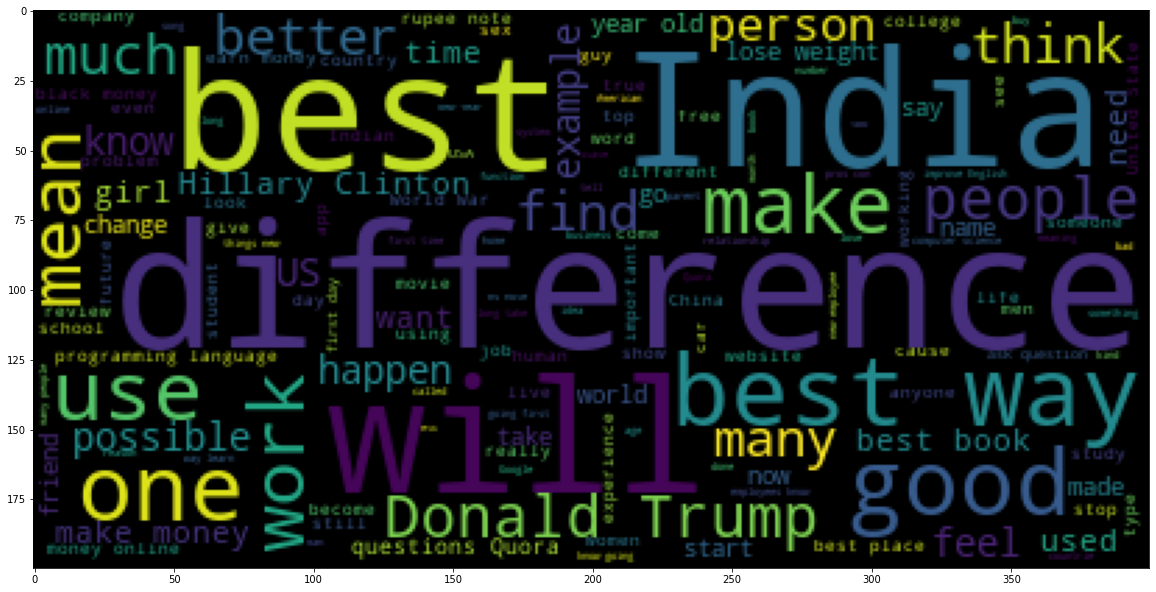

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(wc)


In [4]:
import nltk

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


one hot integer encoding word

In [14]:
import keras
from keras.preprocessing.text import one_hot
test_corpus = []
for i in range(2000):
  test_corpus.append(one_hot(train_qs[i],10000))


In [17]:
max_length=0
for c in test_corpus:
  max_length = max(len(c), max_length)
max_length

66

In [19]:
from keras.preprocessing.sequence import pad_sequences
padded_corpus = pad_sequences(test_corpus, max_length, padding='post')

In [21]:
from keras.layers import Dense, Flatten, Input, Embedding
from keras.models import Model

In [23]:
input = Input((max_length,),dtype='float32')
embedding = Embedding(input_dim=10000, output_dim=64, input_length=max_length)(input)
word_vec = Flatten()(embedding)
model = Model([input], word_vec)
model.compile(keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 66)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 66, 64)            640000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4224)              0         
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [28]:
word_embedding = model.predict(padded_corpus)

In [29]:
word_embedding = word_embedding.reshape(-1, max_length,64)


In [30]:
word_embedding.shape

(2000, 66, 64)